<a href="https://colab.research.google.com/github/khanhtran0259/Fruits_Vegetables/blob/main/Fruits_and_Vegetables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
'/content/drive/MyDrive/cv-projetc/Fruits_Vegetables/datasets'

In [2]:
import os
for dirpath , dirname, filename in os.walk('/content/drive/MyDrive/cv-projetc/Fruits_Vegetables/datasets'):
  print(f"There are  {len(dirname)} directories and {len(filename)} image in '{dirpath}'.")

There are  3 directories and 0 image in '/content/drive/MyDrive/cv-projetc/Fruits_Vegetables/datasets'.
There are  36 directories and 0 image in '/content/drive/MyDrive/cv-projetc/Fruits_Vegetables/datasets/train'.
There are  0 directories and 90 image in '/content/drive/MyDrive/cv-projetc/Fruits_Vegetables/datasets/train/bell pepper'.
There are  0 directories and 88 image in '/content/drive/MyDrive/cv-projetc/Fruits_Vegetables/datasets/train/beetroot'.
There are  0 directories and 75 image in '/content/drive/MyDrive/cv-projetc/Fruits_Vegetables/datasets/train/banana'.
There are  0 directories and 68 image in '/content/drive/MyDrive/cv-projetc/Fruits_Vegetables/datasets/train/apple'.
There are  0 directories and 89 image in '/content/drive/MyDrive/cv-projetc/Fruits_Vegetables/datasets/train/capsicum'.
There are  0 directories and 92 image in '/content/drive/MyDrive/cv-projetc/Fruits_Vegetables/datasets/train/garlic'.
There are  0 directories and 82 image in '/content/drive/MyDrive/cv-p

In [3]:
train_dir = '/content/drive/MyDrive/cv-projetc/Fruits_Vegetables/datasets/train/'
test_dir = '/content/drive/MyDrive/cv-projetc/Fruits_Vegetables/datasets/test/'
val_dir = '/content/drive/MyDrive/cv-projetc/Fruits_Vegetables/datasets/validation/'

In [4]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['apple' 'banana' 'beetroot' 'bell pepper' 'cabbage' 'capsicum' 'carrot'
 'cauliflower' 'chilli pepper' 'corn' 'cucumber' 'eggplant' 'garlic'
 'ginger' 'grapes' 'jalepeno' 'kiwi' 'lemon' 'lettuce' 'mango' 'onion'
 'orange' 'paprika' 'pear' 'peas' 'pineapple' 'pomegranate' 'potato'
 'raddish' 'soy beans' 'spinach' 'sweetcorn' 'sweetpotato' 'tomato'
 'turnip' 'watermelon']


In [ ]:
import os
from PIL import Image

def convert_images_to_rgba(directory):
    for subdir, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(subdir, file)
            try:
                with Image.open(file_path) as img:
                    if img.mode == 'P':
                        img = img.convert('RGBA')
                        # Đổi tên file nếu cần để lưu lại dưới định dạng PNG
                        base, ext = os.path.splitext(file_path)
                        new_file_path = base + ".png"
                        img.save(new_file_path)
                        # Xóa file cũ nếu cần thiết
                        if ext.lower() != ".png":
                            os.remove(file_path)
            except (OSError, Image.DecompressionBombError, Image.UnidentifiedImageError):
                print(f"Cannot process file: {file_path}, skipping.")


# Chuyển đổi ảnh trong các thư mục
convert_images_to_rgba(train_dir)
convert_images_to_rgba(test_dir)
convert_images_to_rgba(val_dir)


In [20]:
convert_images_to_rgba(train_dir)

Cannot process file: /content/drive/MyDrive/cv-projetc/Fruits_Vegetables/datasets/train/bell pepper/Image_56.jpg, skipping.


In [19]:
convert_images_to_rgba(test_dir)

In [17]:
convert_images_to_rgba(val_dir)

In [8]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

In [9]:
len(class_names)

36

In [15]:
!pip install Pillow

Image shape: (1000, 1000, 3)


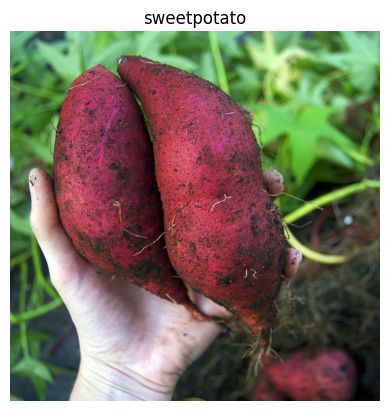

In [10]:
import random
img = view_random_image(train_dir, random.choice(class_names))

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(train_dir, target_size=(224,224), batch_size=32, class_mode='categorical')
test_data = test_datagen.flow_from_directory(test_dir, target_size=(224,224), batch_size=32, class_mode='categorical')
val_data = val_datagen.flow_from_directory(val_dir, target_size=(224,224), batch_size=32, class_mode='categorical')

Found 3115 images belonging to 36 classes.
Found 359 images belonging to 36 classes.
Found 351 images belonging to 36 classes.


In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten

model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPool2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(len(class_names), activation='softmax')
])

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
history = model.fit(train_data, epochs=10, steps_per_epoch=len(train_data) ,validation_data=val_data, validation_steps=len(val_data))

Epoch 1/10
98/98 [==============================] - 279s 3s/step - loss: 2.0476 - accuracy: 0.4177 - val_loss: 1.0503 - val_accuracy: 0.7778
Epoch 2/10
98/98 [==============================] - 99s 1s/step - loss: 1.3495 - accuracy: 0.6215 - val_loss: 0.4675 - val_accuracy: 0.8860
Epoch 3/10
98/98 [==============================] - 99s 1s/step - loss: 0.5786 - accuracy: 0.8337 - val_loss: 0.4400 - val_accuracy: 0.9174
Epoch 4/10
98/98 [==============================] - 99s 1s/step - loss: 0.2366 - accuracy: 0.9406 - val_loss: 0.3141 - val_accuracy: 0.9516
Epoch 5/10
98/98 [==============================] - 97s 993ms/step - loss: 0.1265 - accuracy: 0.9788 - val_loss: 0.4248 - val_accuracy: 0.9430
Epoch 6/10
98/98 [==============================] - 98s 1s/step - loss: 0.0899 - accuracy: 0.9865 - val_loss: 0.4405 - val_accuracy: 0.9573
Epoch 7/10
98/98 [==============================] - 102s 1s/step - loss: 0.0823 - accuracy: 0.9881 - val_loss: 0.3310 - val_accuracy: 0.9601
Epoch 8/10
98/9

In [24]:
model.evaluate(test_data)

12/12 [==============================] - 67s 6s/step - loss: 0.4021 - accuracy: 0.9554


[0.4021192789077759, 0.9554317593574524]

In [25]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

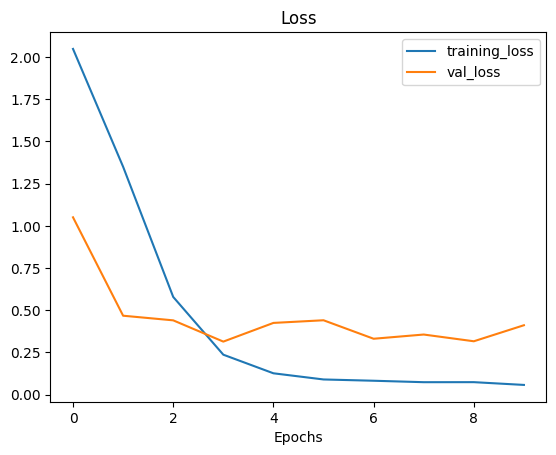

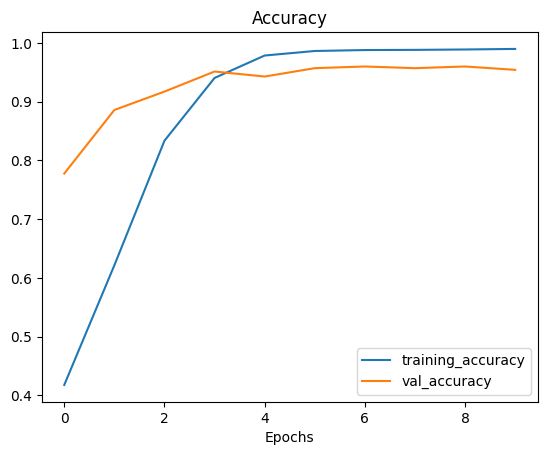

In [26]:
plot_loss_curves(history)

In [31]:
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [27]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [46]:
!wget https://png.pngtree.com/png-vector/20200821/ourlarge/pngtree-a-bunch-of-yellow-fresh-bananas-laid-flat-png-image_2326440.jpg

--2024-06-17 20:06:02--  https://png.pngtree.com/png-vector/20200821/ourlarge/pngtree-a-bunch-of-yellow-fresh-bananas-laid-flat-png-image_2326440.jpg
Resolving png.pngtree.com (png.pngtree.com)... 104.18.3.157, 104.18.2.157, 2606:4700::6812:39d, ...
Connecting to png.pngtree.com (png.pngtree.com)|104.18.3.157|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67161 (66K) [image/jpeg]
Saving to: ‘pngtree-a-bunch-of-yellow-fresh-bananas-laid-flat-png-image_2326440.jpg’

pngtree-a-bunch-of- 100%[===================>]  65.59K  --.-KB/s    in 0.002s  

2024-06-17 20:06:03 (26.1 MB/s) - ‘pngtree-a-bunch-of-yellow-fresh-bananas-laid-flat-png-image_2326440.jpg’ saved [67161/67161]



1/1 [==============================] - 0s 17ms/step


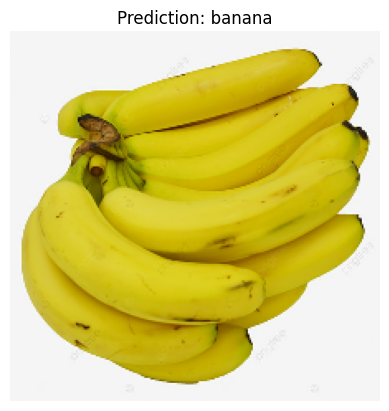

In [47]:
img_url = '/content/pngtree-a-bunch-of-yellow-fresh-bananas-laid-flat-png-image_2326440.jpg'
pred_and_plot(model, img_url, class_names)